In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import join
import re
from joblib import load
from features import FeatureGenerator
from sklearn.metrics import mean_squared_error

In [59]:
# if the plots look bad, run it again
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
df = pd.read_csv('../train.csv')

In [4]:
targets = df.columns.difference(['text_id', 'full_text']).to_list()

In [5]:
targets

['cohesion', 'conventions', 'grammar', 'phraseology', 'syntax', 'vocabulary']

In [6]:
GENERATE_CSV_FILES = 0

In [7]:
if GENERATE_CSV_FILES:
    manual_check = df.sample(n=100, random_state=42).copy()
    team_members = ['train', 'alex', 'abdallah', 'mohamed', 'shahinde']
    for i, member in enumerate(team_members):
        if member != 'train':
            manual_check[targets] = 0
        manual_check[20*i : 20*(i+1)].to_csv('manual_check_' + member + '.csv')

In [8]:
test_size = 80
path = './human_baseline_data'

In [9]:
d = []
for file in listdir(path):
    filepath = join(path, file)
    name = re.findall('[a-z]+', file)[0]
    if 'semicol' in file:
        tmp_df = pd.read_csv(filepath, sep=';')
    else:
        tmp_df = pd.read_csv(filepath)
    tmp_df['name'] = name
    d.append(tmp_df)
results = pd.concat(d, axis=0, ignore_index=True)

In [10]:
df['text_id'].duplicated().any()

False

In [11]:
results['text_id'].duplicated().any()

False

In [12]:
df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [13]:
pd.set_option('display.max_rows', 100)
results

,Unnamed: 0,text_id,full_text,cohesion,conventions,grammar,phraseology,syntax,vocabulary,name
0,733,3898358B58BB,"To conserve energy and resources, Some busines...",3.0,2.5,3.0,3.0,3.0,3.0,alex
1,2244,A80542F83A7C,Some schools offer distance learning as an opt...,3.5,3.5,3.0,3.0,3.5,3.0,alex
2,1674,7F1F55F771F9,I agree with the adoption about the midnight w...,2.0,2.0,2.0,2.0,2.0,2.0,alex
3,2024,98CD7819C7EF,Some people believes that making mistakes is h...,2.5,2.5,2.5,2.5,2.5,2.5,alex
4,3725,F86CA3BFAB20,"I take ""Determine never to be idle...It is won...",2.5,2.5,2.5,2.5,2.5,3.0,alex
5,1957,93C575DB7931,Would you rather ask one person or multiple fo...,2.5,2.5,2.5,2.5,2.5,2.5,alex
6,831,400E5AA27067,It has been said that first impressions are im...,3.0,2.5,3.0,3.0,2.5,3.0,alex
7,2755,CA4941643D09,Thomas Jefferson wrote to never to be idle and...,2.0,2.5,3.0,3.0,3.0,3.0,alex
8,2522,BB5B58E098AB,Well i think we choose our own character trait...,2.0,2.0,2.0,2.0,2.0,2.0,alex
9,1978,959946A3FB03,Has the limitation of human contact due to the...,2.5,2.5,2.5,2.5,2.5,2.5,alex


In [14]:
pd.reset_option('display.max_rows')

In [15]:
def MCRMSE(a, b):
    return (((a - b)**2).mean(axis=0)**0.5).mean()

In [16]:
def get_error(r: pd.DataFrame):
    r = r.reset_index(drop=True)
    truth = df.merge(r.text_id, how='right')
    return MCRMSE(truth[targets], r[targets])

In [24]:
scores = pd.DataFrame()

In [25]:
scores[['name', 'score']] = [['human_baseline', get_error(results)]]

In [26]:
scores

,name,score
0,human_baseline,0.853956


In [27]:
scores = pd.concat([scores, results.groupby('name').apply(get_error).reset_index(name='score')], ignore_index=True)

In [28]:
scores

,name,score
0,human_baseline,0.853956
1,abdallah,0.737559
2,alex,0.692022
3,mohamed,1.223827
4,shahinde,0.610126


now let's compare it with model performance

In [29]:
test_df = df.merge(results.text_id, how='right')

In [30]:
mean_squared_error(test_df[targets], results[targets], squared=False)

0.8539556602204089

In [31]:
train_df = df.merge(results.text_id, how='left', indicator=True)

In [32]:
train_df = train_df[train_df['_merge'] == 'left_only']

In [33]:
train_df = train_df.drop(columns=['_merge'])

let's start with dummy regressor

In [34]:
from sklearn.dummy import DummyRegressor

In [35]:
dummy_mean_reg = DummyRegressor()

In [36]:
dummy_mean_reg.fit(X=train_df, y=train_df[targets])

DummyRegressor()

In [37]:
dummy_test_error = mean_squared_error(test_df[targets], dummy_mean_reg.predict(X=test_df), squared=False)

In [39]:
scores = pd.concat([scores, pd.DataFrame({'name': ['dummy_mean_reg'], 'score': [dummy_test_error]})], ignore_index=True)

now let's try our more advanced model

In [40]:
model_name = 'xgb_linreg_rf'

In [41]:
model = load('./xgb_linreg_rf.joblib')

In [42]:
feature_generator = FeatureGenerator()

In [43]:
train_df_w_features = feature_generator.generate_features(train_df)

In [45]:
test_df_w_features = feature_generator.generate_features(test_df)

In [46]:
features = train_df_w_features.iloc[:,8:].columns

In [47]:
model.fit(train_df_w_features[features], train_df_w_features[targets])

MultiOutputRegressor(estimator=VotingRegressor(estimators=[('xgb',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         gamma=None,
  

In [48]:
model_test_error = mean_squared_error(test_df_w_features[targets], model.predict(test_df_w_features[features]), squared=False)

In [51]:
scores = pd.concat([scores, pd.DataFrame({'name': ['xgb_linreg_rf'], 'score': [model_test_error]})], ignore_index=True)

In [52]:
scores

,name,score
0,human_baseline,0.853956
1,abdallah,0.737559
2,alex,0.692022
3,mohamed,1.223827
4,shahinde,0.610126
5,dummy_mean_reg,0.63873
6,xgb_linreg_rf,0.504573


<AxesSubplot:ylabel='name'>

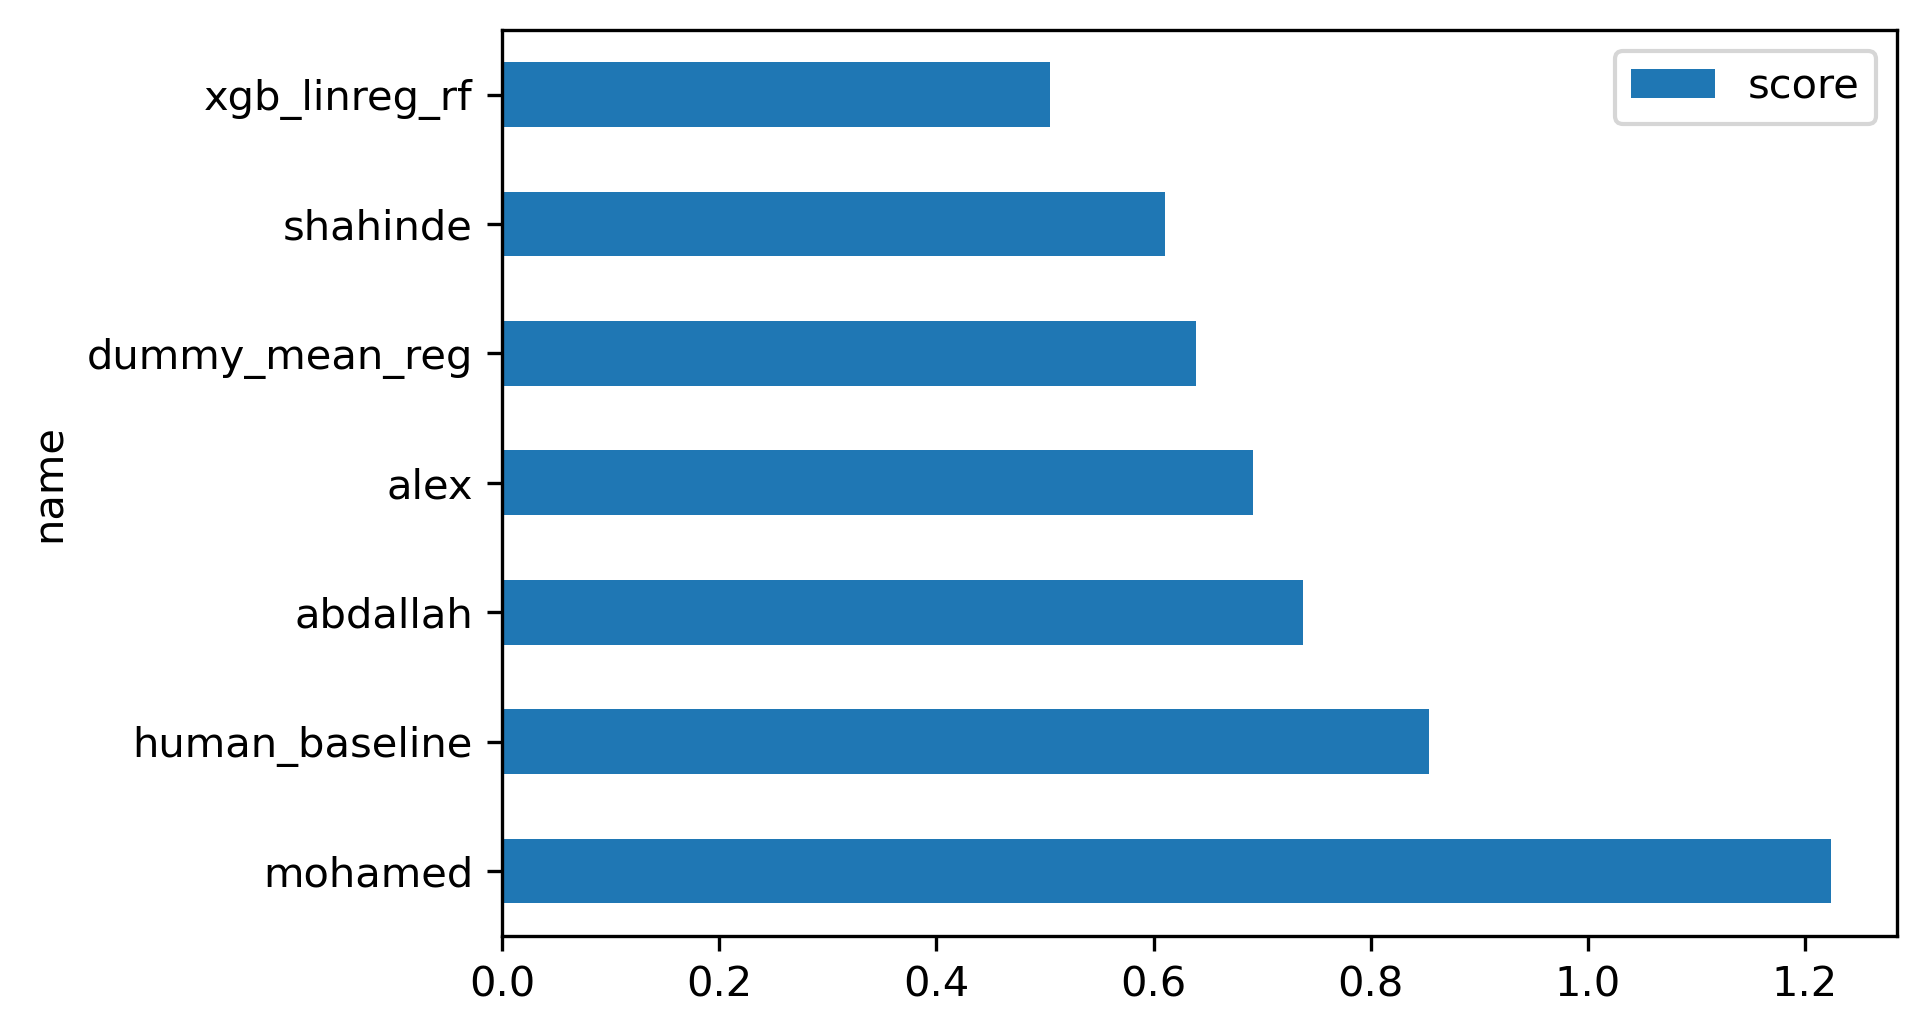

In [63]:
scores = scores.sort_values(by='score', ascending=False)
scores.plot.barh(x='name', y='score')

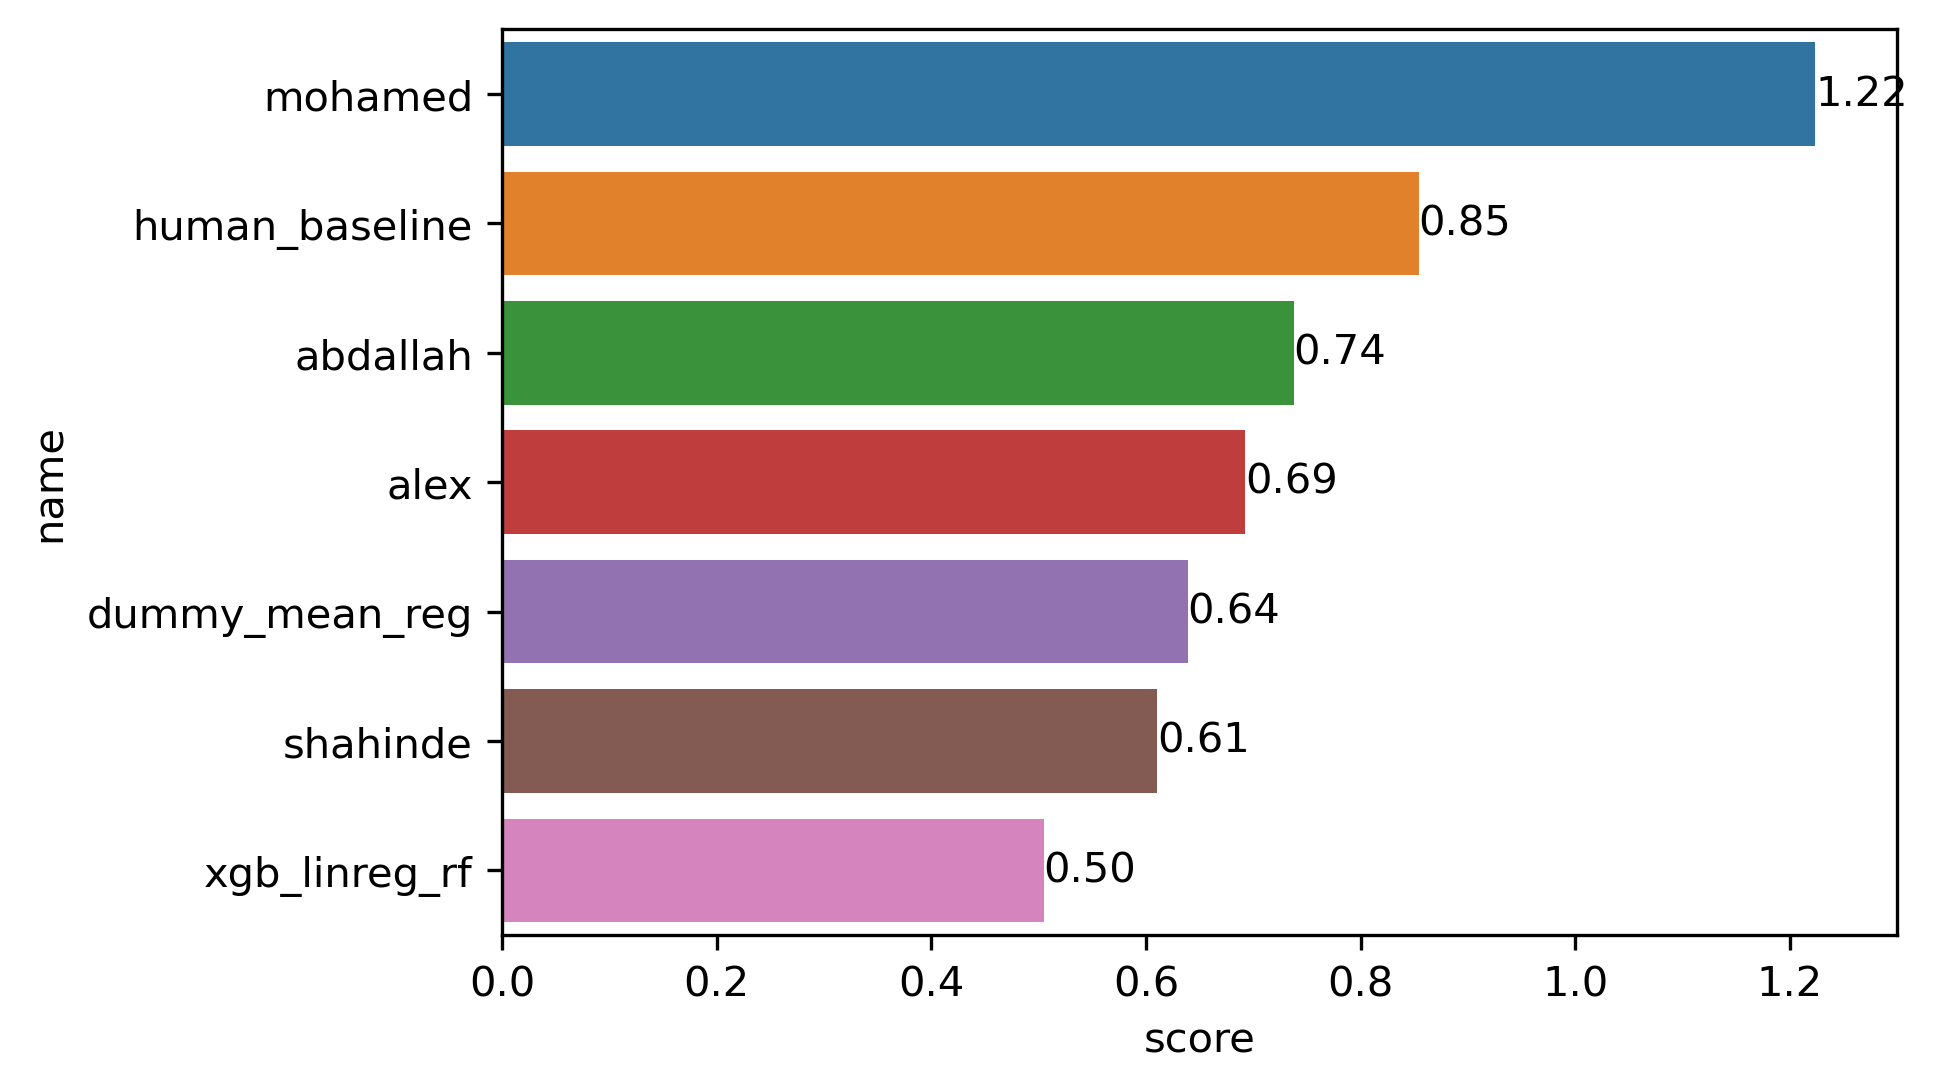

In [64]:
ax = sns.barplot(data=scores, x='score', y='name')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
ax.set_xbound(upper=1.3)